In [1]:
import os
import re

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../..") # Adds higher directory to python modules path for importing from src dir

import pandas as pd

from src.datasets import NyseSecuritiesDataset
from src.datasets import NyseStocksDataset
from src.datasets import NyseFundamentalsDataset

In [3]:
HOME = "../.."
DATA_DIR = "data"
NYSE_FUNDAMENTALS = os.path.join(HOME, DATA_DIR, "nyse", "fundamentals.csv")
NYSE_PRICES = os.path.join(HOME, DATA_DIR, "nyse", "prices.csv")
NYSE_PRICES_SPLIT = os.path.join(HOME, DATA_DIR, "nyse", "prices-split-adjusted.csv")
NYSE_SECURITIES = os.path.join(HOME, DATA_DIR, "nyse", "securities.csv")

In [4]:
fund = pd.read_csv(NYSE_FUNDAMENTALS)
securities = pd.read_csv(NYSE_SECURITIES)
prices = pd.read_csv(NYSE_PRICES)
prices_split = pd.read_csv(NYSE_PRICES_SPLIT)

In [5]:
prices['date'] = pd.to_datetime(prices['date'], errors='coerce')  # [datetime.strptime(x[:10], '%Y-%m-%d') for x in prices['date']]
prices_split['date'] = pd.to_datetime(prices_split['date'], errors='coerce')
securities['Date first added'] = pd.to_datetime(securities['Date first added'], errors='coerce')

### Duplicate securities for one company

Stock classes are used to distribute shares with different voting rights. e.g. Googles founders (Class B) have more voting rights as with normal shares (Class A). Class C is defined for shares without voting rights.

https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#Recent_changes_to_the_list_of_S&P_500_Components

##### Other observations:
- Table just copied from Wikipedia (presumably at the end of 2016)
- Some security names are missing Inc./Corp. missing (verified via Wikipedia)
- Date first added is sometimes undefined (also in Wikipedia table)
- The state might have changed between 2010 & 2016. Take this into consideration?

In [227]:
x = securities.copy()
idx = securities.index[securities['Ticker symbol'] == 'DISCA'][0]
x.loc[idx, 'Security'] = 'Discovery Communications Class A'  # Before: Discovery Communications-A
idx = securities.index[securities['Ticker symbol'] == 'DISCK'][0]
x.loc[idx, 'Security'] = 'Discovery Communications Class C'  # Before: Discovery Communications-C
idx = securities.index[securities['Ticker symbol'] == 'UA'][0]
x.loc[idx, 'Security'] = 'Under Armour Class C'  # Before: Under Armour
idx = securities.index[securities['Ticker symbol'] == 'UAA'][0]
x.loc[idx, 'Security'] = 'Under Armour Class A'  # Before: Under Armour

In [228]:
columns = x.columns.tolist()
columns.insert(1, 'Name')

regex_pat = re.compile(r'\WClass (A|B|C)$', flags=re.IGNORECASE)
x['Name'] = x['Security'].str.replace(regex_pat, '')

x = x[columns]  # Change order

In [39]:
securities[securities['Ticker symbol'] == 'AMZN']

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
26,AMZN,Amazon.com Inc,reports,Consumer Discretionary,Internet & Direct Marketing Retail,"Seattle, Washington",2005-11-18,1018724


In [244]:
prices[prices['symbol'] == 'AMZN'].head()

,date,symbol,open,close,low,high,volume
284,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
751,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
1219,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
1687,2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0
2155,2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0


In [238]:
import nyse

In [240]:
nyse.load()

In [241]:
nyse.get_securities_problems()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
23,GOOGL,Alphabet Inc Class A,reports,Information Technology,Internet Software & Services,"Mountain View, California",2014-04-03,1652044
24,GOOG,Alphabet Inc Class C,reports,Information Technology,Internet Software & Services,"Mountain View, California",NaN,1652044
142,DISCA,Discovery Communications-A,reports,Consumer Discretionary,Cable & Satellite,"Silver Spring, Maryland",2010-03-01,1437107
143,DISCK,Discovery Communications-C,reports,Consumer Discretionary,Cable & Satellite,"Silver Spring, Maryland",2014-08-07,1437107
326,NWSA,News Corp. Class A,reports,Consumer Discretionary,Publishing,"New York, New York",2013-08-01,1564708
327,NWS,News Corp. Class B,reports,Consumer Discretionary,Publishing,"New York, New York",2015-09-18,1564708
449,FOXA,Twenty-First Century Fox Class A,reports,Consumer Discretionary,Publishing,"New York, New York",2013-07-01,1308161
450,FOX,Twenty-First Century Fox Class B,reports,Consumer Discretionary,Publishing,"New York, New York",2015-09-18,1308161
455,UA,Under Armour,reports,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","Baltimore, Maryland",2014-05-01,1336917
456,UAA,Under Armour,reports,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","Baltimore, Maryland",2016-03-25,1336917


In [236]:
nyse.get_fundamentals('UA')

({'UA': {'exchange': 'NYQ',
   'shortName': 'Under Armour, Inc. Class C',
   'longName': 'Under Armour, Inc.',
   'exchangeTimezoneName': 'America/New_York',
   'exchangeTimezoneShortName': 'EST',
   'isEsgPopulated': False,
   'gmtOffSetMilliseconds': '-18000000',
   'underlyingSymbol': None,
   'quoteType': 'EQUITY',
   'symbol': 'UA',
   'underlyingExchangeSymbol': None,
   'headSymbol': None,
   'messageBoardId': 'finmb_8740684',
   'uuid': '3943d879-5e03-38e3-b07b-5b71eac1b669',
   'market': 'us_market'}},
 {'balanceSheetHistory': {'UA': [{'2017-12-31': {'intangibleAssets': 46995000,
      'capitalSurplus': 872266000,
      'totalLiab': 1987725000,
      'totalStockholderEquity': 2018642000,
      'otherCurrentLiab': 50426000,
      'totalAssets': 4006367000,
      'commonStock': 146000,
      'retainedEarnings': 1184441000,
      'otherLiab': 162304000,
      'goodWill': 555674000,
      'treasuryStock': -38211000,
      'otherAssets': 166445000,
      'cash': 312483000,
      't

## Inspect completeness of NYSE data

In [10]:
fundamentals_ds = NyseFundamentalsDataset(file_path='../../data/nyse/fundamentals.csv');
fund_data = fundamentals_ds.data()
securities_ds = NyseSecuritiesDataset(file_path='../../data/nyse/securities.csv'); securities_ds.load()

fund_symbols = set(fund_data['Ticker Symbol'].unique())
securities_symbols = set(securities_ds.get_all_company_names()['Ticker symbol'].values)
prices = pd.read_csv('../../data/nyse/prices-split-adjusted.csv')
prices_symbols = set(prices.symbol.unique())

fund_companies_without_sec = fund_symbols - securities_symbols
fund_companies_without_prices = fund_symbols - prices_symbols
sec_comp_without_fund = securities_symbols - fund_symbols
sec_comp_without_prices = securities_symbols - prices_symbols
prices_comp_without_fund = prices_symbols - fund_symbols
prices_comp_without_sec = prices_symbols - securities_symbols

print(f'Fund companies: {len(fund_symbols)}, Sec companies: {len(securities_symbols)}, Price companies: {len(prices_symbols)}\n')
print('fund_companies_without_sec:', sorted(fund_companies_without_sec), '\n')
print('fund_companies_without_prices:', sorted(fund_companies_without_prices), '\n')
print('sec_comp_without_fund:', sorted(sec_comp_without_fund), '\n')
print('sec_comp_without_prices:', sorted(sec_comp_without_prices), '\n')
print('prices_comp_without_fund:', sorted(prices_comp_without_fund), '\n')
print('prices_comp_without_sec:', sorted(prices_comp_without_sec), '\n')

Fund companies: 448, Sec companies: 505, Price companies: 501

fund_companies_without_sec: [] 

fund_companies_without_prices: ['UA'] 

sec_comp_without_fund: ['A', 'ACN', 'ADP', 'AES', 'AET', 'AGN', 'BEN', 'BF.B', 'BLK', 'BRK.B', 'CA', 'CBS', 'CMCSA', 'COH', 'COP', 'DOW', 'DTE', 'ENDP', 'ESRX', 'EVHC', 'FITB', 'FOX', 'FOXA', 'FTI', 'FTV', 'GE', 'GOOG', 'GOOGL', 'GS', 'ICE', 'IR', 'JCI', 'JNJ', 'KHC', 'L', 'LNC', 'MDT', 'MNK', 'MS', 'MSI', 'NI', 'NOC', 'NRG', 'ORCL', 'PLD', 'PRGO', 'PSA', 'PXD', 'RAI', 'RF', 'RIG', 'RTN', 'SLB', 'TROW', 'TWX', 'URI', 'WBA'] 

sec_comp_without_prices: ['BF.B', 'BRK.B', 'MS', 'UA'] 

prices_comp_without_fund: ['A', 'ACN', 'ADP', 'AES', 'AET', 'AGN', 'BEN', 'BLK', 'CA', 'CBS', 'CMCSA', 'COH', 'COP', 'DOW', 'DTE', 'ENDP', 'ESRX', 'EVHC', 'FITB', 'FOX', 'FOXA', 'FTI', 'FTV', 'GE', 'GOOG', 'GOOGL', 'GS', 'ICE', 'IR', 'JCI', 'JNJ', 'KHC', 'L', 'LNC', 'MDT', 'MNK', 'MSI', 'NI', 'NOC', 'NRG', 'ORCL', 'PLD', 'PRGO', 'PSA', 'PXD', 'RAI', 'RF', 'RIG', 'RTN', 'SLB'

### Get permanent components

In [6]:
primary = '#037d95'  # blue green
secondary = '#ffa823'  # orange yellow
ternary = '#c8116b'  # red violet
colors = (primary, secondary, ternary)

In [9]:
securities_ds = NyseSecuritiesDataset(file_path='../../data/nyse/securities.csv', load=True)
stocks_ds = NyseStocksDataset(file_path='../../data/nyse/prices-split-adjusted.csv', load=True, incl_test=True)
prices_symbols = set(stocks_ds.get_all_prices().symbol.unique())

In [10]:
x = stocks_ds.get_all_prices()
x = x[(x.date <= pd.to_datetime('2013-11-29'))]

counts = x.groupby('symbol').count()
amount_variations = counts.groupby('date').count().open
required = amount_variations.idxmax()  # until 2013-11-16 -> 983 samples

In [17]:
comps = securities_ds.get_historical_components('../..')
comps.sort(key=lambda x: x['Date'])
entries = pd.DataFrame([(pd.to_datetime(entry['Date']), len(entry['Symbols'])) for entry in comps], columns=['Date', 'Components'])

In [18]:
changes = []
for a, b in zip(comps[:-1], comps[1:]):
    prev, curr = set(a['Symbols']), set(b['Symbols'])
    removed = prev - curr
    added = curr - prev
    date = pd.to_datetime(b['Date'])
    changes.append((date, len(curr), len(removed), len(added), ', '.join(removed), ', '.join(added), ))
changes = pd.DataFrame(changes, columns=['date', 'n_comp', 'n_rem', 'n_add', 'rem', 'add'])

In [22]:
f.get_figwidth()

6.0

Removed    217
Added      227
dtype: int64


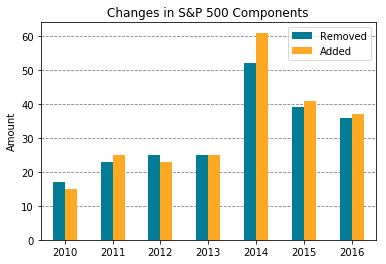

In [19]:
sums_per_year = changes.groupby(changes.date.dt.year).sum()
sums_per_year = sums_per_year[(sums_per_year.index >= 2010) & (sums_per_year.index <= 2016)]
sums_per_year = sums_per_year[['n_rem', 'n_add']].rename({'n_rem': 'Removed', 'n_add': 'Added'}, axis=1)
ax = sums_per_year.plot.bar(color=colors[:2])
ax.set_xticklabels(ax.get_xticklabels(), rotation='horizontal')
ax.set_title('Changes in S&P 500 Components')
ax.set_xlabel('')
ax.set_ylabel('Amount')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
# plt.gcf().savefig('sp500-comp-changes.pdf')
print(sums_per_year.sum())

In [138]:
prev = set(comps[23]['Symbols'])  # Begin of 2013, start of observed period
last = set(comps[108]['Symbols'])  # Begin of 2017, lowest difference to Kaggle set
always_present = prev.intersection(last)
added = last - prev
removed = prev - last
len(always_present), len(prev), len(last), len(removed), len(added)

# Example company missing in NYSE dataset: MWV (was renamed to WRK in 2015)

(350, 499, 509, 149, 159)

### Plot GSPC, VIX, and 

In [26]:
full_stocks_ds = NyseStocksDataset(file_path='../../data/nyse/prices-split-adjusted.csv', load=True, incl_test=True, features=['close'])
vix = full_stocks_ds.load_vix().set_index('date')
gspc = full_stocks_ds.load_gspc().set_index('date')

In [44]:
vix = full_stocks_ds.load_vix().reset_index(drop=True)
gspc = full_stocks_ds.load_gspc().reset_index(drop=True)

In [ ]:
features = pd.DataFrame([lrets, gspc.gspc_close, vix.vix_close], index=['lrets', 'gspc', 'vix']).T
features.corr()

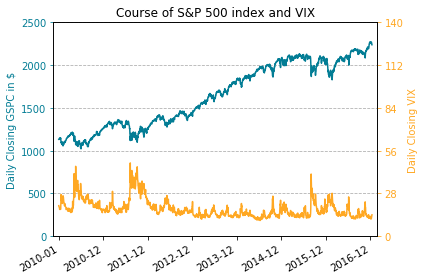

In [48]:
ax = gspc.gspc_close.plot(color=colors[0])
fig = ax.get_figure()
ax.set_xlim((-30, len(gspc.gspc_close) + 30))
xticklabels = np.concatenate([[''], gspc.date.dt.strftime('%Y-%m').iloc[ax.get_xticks()[1:-1].astype(int)].astype(str), ['']])
ax.set_xticklabels(xticklabels)
fig.autofmt_xdate()
# Make the y-axis label, ticks and tick labels match the line color.
ax.set_ylabel('Daily Closing GSPC in $', color=colors[0])
ax.tick_params('y', colors=colors[0])
a, b = ax.get_ylim()
ax.set_ylim((0, 2500))
ax.yaxis.grid(linestyle='dashed')

ax2 = ax.twinx()
vix.vix_close.plot(ax=ax2, color=colors[1])
ax2.set_ylabel('Daily Closing VIX', color=colors[1])
ax2.tick_params('y', colors=colors[1])
a, b = ax2.get_ylim()
ax2.set_ylim((0, b * 2.5))
ax2.set_title('Course of S&P 500 index and VIX')
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))

fig.tight_layout()
# fig.savefig('index-and-vix.pdf')

### Analysing VIX bursts

Source for dates:
- Thu 20 May 2010 -> Euro Debt Crisis (https://web.archive.org/web/20120119024738/https://money.cnn.com/2010/05/20/markets/fear_markets/index.htm)
- Mon 08 Aug 2011 -> Euro Debt Crisis (https://money.cnn.com/2011/08/08/markets/vix_fear_index/index.htm)
- Mon 24 Aug 2015 -> "1000-point pludge" in Dow, caused by rout in chinese market, influenced all globals markets
    https://money.cnn.com/2015/08/24/investing/stocks-markets-selloff-china-crash-dow/index.html

In [ ]:
# From https://tomaugspurger.github.io/modern-7-timeseries.html
m = roll.agg(['mean', 'std'])
ax = m['mean'].plot()
ax.fill_between(m.index, m['mean'] - m['std'], m['mean'] + m['std'],
                alpha=.25)
plt.tight_layout()
plt.ylabel("Close ($)")